# DAX Homework

Author         : Romansya Setyo Utomo

Last updated   : November 16th, 2019

# Introduction

A dataset of scores of four subjects (Physics, Science, Statistics, and Math) were given.

Goals :

1) Data Analysis

2) Develop Prediction Model to predict the score of Math based on the other subjects' score

## Load the Data

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

## Quick View of the Data

In [2]:
data.head()

,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82


In [3]:
data.tail()

,Pysics,Science,Statistics,Math
445,91,87,74,91
446,60,71,83,82
447,65,80,71,63
448,91,66,85,65
449,65,73,69,73


# Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Summary of the Data

In [5]:
data.describe()

,Pysics,Science,Statistics,Math
count,450.000000,450.000000,450.000000,450.000000
mean,71.746667,72.662222,73.757778,74.586667
std,16.066061,14.333186,12.163017,11.476239
min,0.000000,0.000000,22.000000,22.000000
25%,66.000000,66.000000,67.000000,67.000000
50%,74.000000,74.000000,74.000000,74.000000
75%,82.000000,82.000000,83.000000,83.000000
max,99.000000,99.000000,100.000000,99.000000


The data has 450 rows. The Physics and Science score ranges from 0 to 99, Statistics score ranges from 22 to 100, and Math score ranges from 22 to 99.

## Distribution Plot

The following plot shows the distribution of each feature, where most of the score ranges from 50 to 100.

In [6]:
# additional data
data_avg = pd.read_csv('data_avg.csv')

### Physics

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


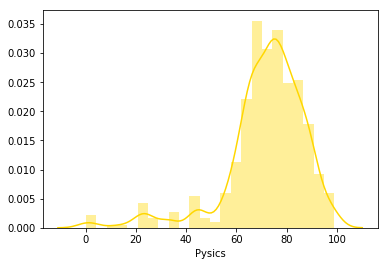

In [7]:
sns.distplot(data['Pysics'], color = 'gold')
plt.show()

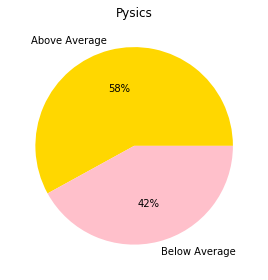

In [8]:
plt.pie(
    # using data total)arrests
    data_avg['Pysics'],
    # with the labels being officer names
    labels=data_avg['Subj'],
    # color
    colors = ['gold', 'pink'],
    # with the percent listed as a fraction
    autopct='%1.0f%%',
    )
plt.title('Pysics')
plt.tight_layout()
plt.show()

### Science

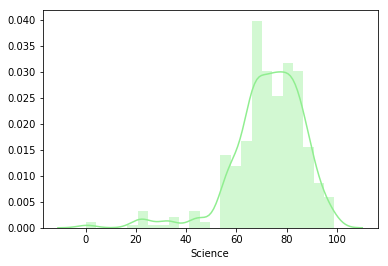

In [9]:
sns.distplot(data['Science'], color = 'lightgreen')
plt.show()

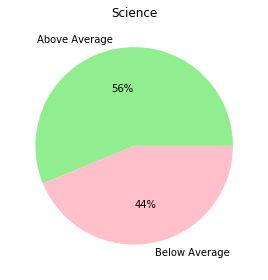

In [10]:
plt.pie(
    # using data total)arrests
    data_avg['Science'],
    # with the labels being officer names
    labels=data_avg['Subj'],
    # color
    colors = ['lightgreen', 'pink'],
    # with the percent listed as a fraction
    autopct='%1.0f%%',
    )
plt.title('Science')
plt.tight_layout()
plt.show()

### Statistics

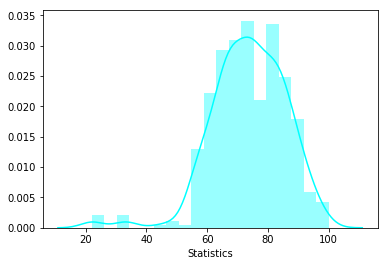

In [11]:
sns.distplot(data['Statistics'], color = 'cyan')
plt.show()

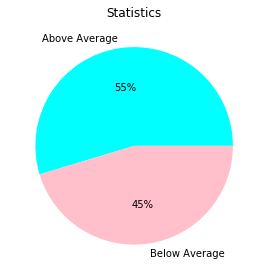

In [12]:
plt.pie(
    # using data total)arrests
    data_avg['Statistics'],
    # with the labels being officer names
    labels=data_avg['Subj'],
    # color
    colors = ['cyan', 'pink'],
    # with the percent listed as a fraction
    autopct='%1.0f%%',
    )
plt.title('Statistics')
plt.tight_layout()
plt.show()

### Math

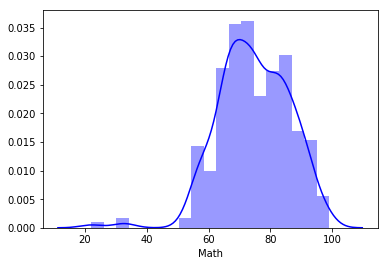

In [13]:
sns.distplot(data['Math'], color = 'blue')
plt.show()

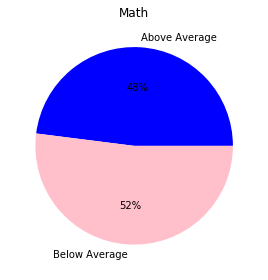

In [14]:
plt.pie(
    # using data total)arrests
    data_avg['Math'],
    # with the labels being officer names
    labels=data_avg['Subj'],
    # color
    colors = ['blue', 'pink'],
    # with the percent listed as a fraction
    autopct='%1.0f%%',
    )
plt.title('Math')
plt.tight_layout()
plt.show()

Unlike the other subjects, there are more students who scored below average in Math.

## Boxplot

The boxplot help in finding and analyzing outlier for each feature. For now, these outliers are kept as it is.

### Physics

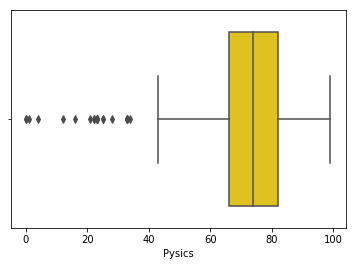

In [15]:
sns.boxplot(data['Pysics'], color = 'gold')
plt.show()

### Science

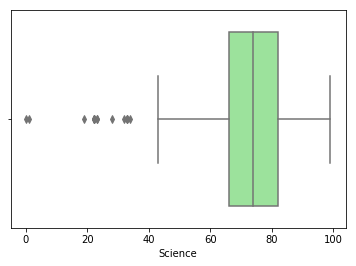

In [16]:
sns.boxplot(data['Science'], color = 'lightgreen')
plt.show()

### Statistics

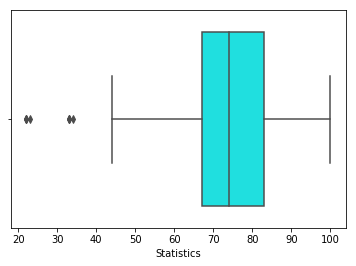

In [17]:
sns.boxplot(data['Statistics'], color = 'cyan')
plt.show()

### Math

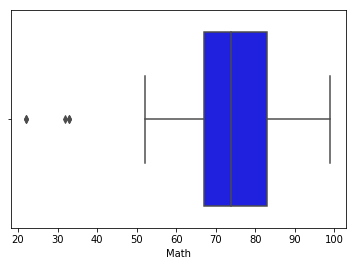

In [18]:
sns.boxplot(data['Math'], color = 'blue')
plt.show()

## Scatterplot

Showng the relation of each subject score to Math score. From this plot, it can't be seen whether it's linear or not.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


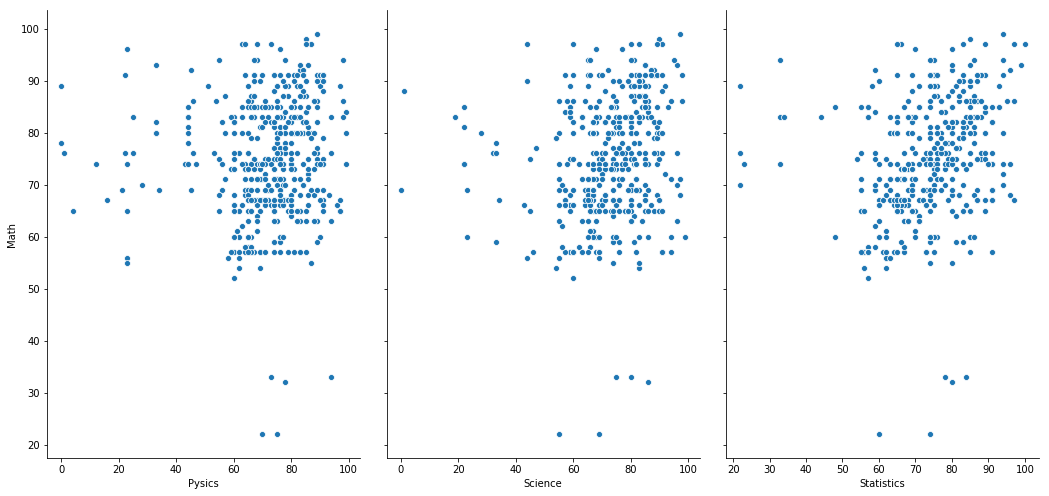

In [19]:
sns.pairplot(data, x_vars=['Pysics','Science','Statistics'], y_vars='Math', size = 7, aspect = 0.7)

We can see the outliers clearly here.

For example there are students who scored extremely low in Physics but got a high score in Math, and vice versa. The same thing occured in the other subjects too. 

Let's see the correlation matrix.

In [20]:
data.corr()

,Pysics,Science,Statistics,Math
Pysics,1.000000,0.100987,0.060251,0.053365
Science,0.100987,1.000000,0.183366,0.156129
Statistics,0.060251,0.183366,1.000000,0.229552
Math,0.053365,0.156129,0.229552,1.000000


The correlation of all the subjects' score to Math score are low. Is it a non-linear relationships? Or is it because of the outliers?

# Modelling

Based on the findings above, there are possibilities that the relationships is a non-linear one.

We're going to try Linear Regression, to see if it's really a non-linear relationship, and Random Forest, which can learn from a non-linear relationship.

The metrics to evaluate the models are the metrics for regression model : MSE, MAE, and RMSE. The closer the value to 0, the better the model is.

## Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# x & y
x = data.drop(columns='Math')
y = data['Math']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(360, 3)
(360,)
(90, 3)
(90,)


In [23]:
# linear regression
linReg = LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [25]:
linReg_mse = mean_squared_error(y_train, linReg.predict(x_train))
linReg_mae = mean_absolute_error(y_train, linReg.predict(x_train))

In [26]:
print("Linear Regression training mse = ",linReg_mse," & mae = ",linReg_mae," & rmse = ", sqrt(linReg_mse))

Linear Regression training mse =  108.31990113710947  & mae =  8.398449933300698  & rmse =  10.407684715493138


In [27]:
linReg_test_mse = mean_squared_error(y_test, linReg.predict(x_test))
linReg_test_mae = mean_absolute_error(y_test, linReg.predict(x_test))

In [28]:
print("Linear Regression test mse = ",linReg_test_mse," & mae = ",linReg_test_mae," & rmse = ", sqrt(linReg_test_mse))

Linear Regression test mse =  180.7282039049785  & mae =  9.842914141650589  & rmse =  13.443519029814274


The easier metric to understand is the MAE, this means that our predictions were on average 9.8 away from the true prediction.

Let's try doing some prediction using this model!

In [29]:
linReg.predict([[84,88,89]]).astype(int)

array([79])

In [30]:
linReg.predict([[65,80,71]]).astype(int)

array([74])

In [31]:
linReg.predict([[64,67,69]]).astype(int)

array([72])

## Random Forest

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [33]:
# x & y
x = data.drop(columns='Math')
y = data['Math']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(360, 3)
(360,)
(90, 3)
(90,)


In [34]:
# random forest
rf_model = RandomForestRegressor()

In [35]:
rf_model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [37]:
rf_mse = mean_squared_error(y_train, rf_model.predict(x_train))
rf_mae = mean_absolute_error(y_train, rf_model.predict(x_train))

In [38]:
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

Random Forest training mse =  20.14649922839506  & mae =  3.3001388888888883  & rmse =  4.488485181928873


In [39]:
rf_test_mse = mean_squared_error(y_test, rf_model.predict(x_test))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(x_test))

In [40]:
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Random Forest test mse =  182.61589197530864  & mae =  9.56574074074074  & rmse =  13.513544759807052


The model works good on the train data with MAE and RMSE under 5, but doing worse on the test data

Let's make some predictions using this model!

In [41]:
rf_model.predict([[84,88,89]]).astype(int)

array([86])

In [42]:
rf_model.predict([[65,80,71]]).astype(int)

array([64])

In [43]:
rf_model.predict([[64,67,69]]).astype(int)

array([68])

# Improvement

We're going to try improving the models, by doing :

Drop the outliers!

And let's see if the model works better.

In [44]:
data_update = data[(data.Pysics > 40) & (data.Science > 40) & (data.Statistics > 40) & (data.Math > 50)]

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


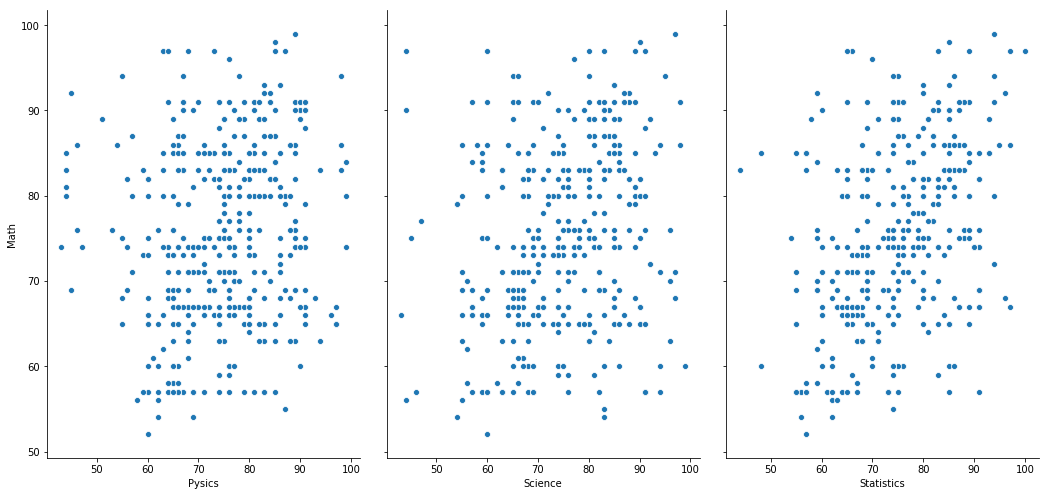

In [45]:
sns.pairplot(data_update, x_vars=['Pysics','Science','Statistics'], y_vars='Math', size = 7, aspect = 0.7)

The updated scatterplot looks better than before, and can be seen as a linear relationship.

In [46]:
data_update.corr()

,Pysics,Science,Statistics,Math
Pysics,1.000000,0.107657,0.216127,0.140238
Science,0.107657,1.000000,0.247446,0.224886
Statistics,0.216127,0.247446,1.000000,0.354037
Math,0.140238,0.224886,0.354037,1.000000


The correlation is still low.

In [47]:
# x & y
x = data_update.drop(columns='Math')
y = data_update['Math']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(321, 3)
(321,)
(81, 3)
(81,)


In [48]:
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
linReg_mse = mean_squared_error(y_train, linReg.predict(x_train))
linReg_mae = mean_absolute_error(y_train, linReg.predict(x_train))
print("Linear Regression training mse = ",linReg_mse," & mae = ",linReg_mae," & rmse = ", sqrt(linReg_mse))
linReg_test_mse = mean_squared_error(y_test, linReg.predict(x_test))
linReg_test_mae = mean_absolute_error(y_test, linReg.predict(x_test))
print("Linear Regression test mse = ",linReg_test_mse," & mae = ",linReg_test_mae," & rmse = ", sqrt(linReg_test_mse))

Linear Regression training mse =  93.38360706466392  & mae =  7.960582511643441  & rmse =  9.663519393298898
Linear Regression test mse =  94.06787224848696  & mae =  7.618473421368457  & rmse =  9.698859327183118


In [50]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
rf_mse = mean_squared_error(y_train, rf_model.predict(x_train))
rf_mae = mean_absolute_error(y_train, rf_model.predict(x_train))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(x_test))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(x_test))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Random Forest training mse =  17.115015576323984  & mae =  3.1626168224299067  & rmse =  4.137029801237112
Random Forest test mse =  89.90703703703706  & mae =  7.253086419753086  & rmse =  9.48193213628093


Final prediction!

In [52]:
linReg.predict([[80,88,78]]).astype(int)

array([78])

In [53]:
rf_model.predict([[80,88,78]]).astype(int)

array([80])

# Conclusion

There aren't much difference in using Linear Regression or Random Forest model. Both of the models produce error less than 10, but still far from 0. This happened because the low correlation of each variable to 'Math'. Even after dropping the outliers, the correlation to 'Math' hasn't reached 0.5. To get more improvement, we need additional data which give more information about the relationship of each variable.